In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("테스트 세트 점수:{:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수:0.88


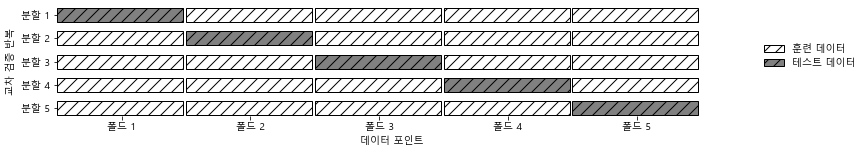

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib

#교차검증이 어떤식으로 되는지에 대한 시각화
#테스트 데이터 부분이 교차가 되며 사용할 수 있으므로 모든 데이터를 테스트 데이터로 사용해볼 수 있다는 장점!
mglearn.plots.plot_cross_validation()

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:{}".format(scores))

교차 검증 점수:[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
#scikit-learn 0.22버전 이상부터 cv=5로 기본값이 변경됨
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("교차 검증 점수:{}".format(scores))

교차 검증 점수:[0.98 0.96 0.98]


In [5]:
#몇 겹인지에 따른 점수가 어떤지 비교해봄 (cv의 수에 따른)

for cv in range(2,11) :
    scores = cross_val_score(logreg, iris.data, iris.target, cv=cv)
    print("cv= ",cv,"교차 검증 점수:{}".format(scores))

cv=  2 교차 검증 점수:[0.96 0.96]
cv=  3 교차 검증 점수:[0.98 0.96 0.98]
cv=  4 교차 검증 점수:[0.97368421 0.97368421 0.94594595 1.        ]
cv=  5 교차 검증 점수:[0.96666667 1.         0.93333333 0.96666667 1.        ]
cv=  6 교차 검증 점수:[0.96 1.   0.96 0.92 0.96 1.  ]
cv=  7 교차 검증 점수:[0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]
cv=  8 교차 검증 점수:[1.         0.94736842 1.         0.89473684 0.94736842 0.94736842
 1.         1.        ]
cv=  9 교차 검증 점수:[1.         0.94117647 1.         0.88235294 1.         0.88235294
 0.9375     1.         1.        ]
cv=  10 교차 검증 점수:[1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [6]:
#교차 검증의 정확도를 간단하게 나타내려면 평균을 사용 -> 이 모델의 정확도는 대략 97%로 기대

print("교차 검증 평균 점수:{:.2f}".format(scores.mean()))

교차 검증 평균 점수:0.97


### sklearn.model_selection.KFold
class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)  
Changed in version `0.22`: n_splits default value changed `from 3 to 5`.

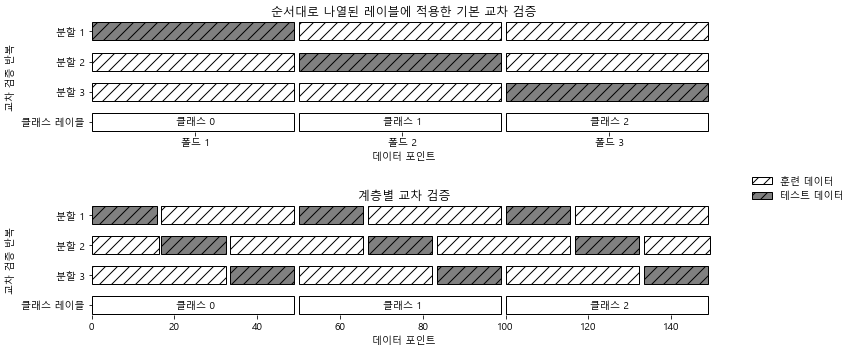

In [7]:
#클래스 레이블 순서대로 정렬된 데이터에서 기본 교차 검증과 걔층별 교차 검증의 비교
#계층별 교차검증(stratified KFold)

mglearn.plots.plot_stratified_cross_validation()

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("교차 검증 점수:", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: [1.         1.         0.86666667 0.93333333 0.83333333]


In [9]:
#3-겹 교차 검증을 사용하는 것이 좋은 방법이 아님을 보여줌 -> 점수가 0점

kfold = KFold(n_splits=3)
print("교차 검증 점수:", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: [0. 0. 0.]


In [10]:
#shuffle=True 로 해주면 데이터를 섞어서 샘플의 순서를 뒤죽박죽만들어주므로 3-겹이여도 성능 점수가 좋음

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수: ",cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:  [0.98 0.96 0.96]


In [11]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


### 임의 분할 교차 검증(shuffle-split CV)
class sklearn.model_selection.ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)  
* train_size 만큼의 포인트로 훈련세트를 만들고, test_size만큼의 포인트로 테스트 세트를 만들도록 분할함(**n_splits 횟수만큼 반복**)  
* 대용량 데이터 작업시 유용함

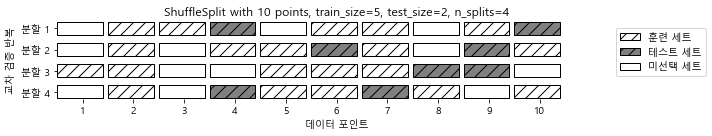

In [12]:
mglearn.plots.plot_shuffle_split()

In [13]:
#LOOC(leave-one-out-cross-val)과 kfold 보다 평균 점수가 0.1 낮음

from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:{}".format(scores))
print("교차 검증 평균 점수:{:.2f}".format(scores.mean()))

교차 검증 점수:[0.96       0.97333333 0.93333333 0.92       0.96       0.97333333
 0.92       0.97333333 0.94666667 0.98666667]
교차 검증 평균 점수:0.95


### 그룹별 교차 검증(GroupKFold)
* 데이터 안에 매우 연관된 그룹이 있을 때도 교차 검증 사용가능  
* 의료 어플리케이션(같은 환자들의 샘플들로 새로운 환자에게 일반화하는 것), 음성인식에서도 새로운 사람의 대화를 인식해야할 때  
* groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹 지정 -> 클래스 레이블과 혼동X

In [14]:
#평균 점수가 0.67로 이 데이터에는 적절하지 않아보임

from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:{}".format(scores))
print("교차 검증 평균 점수:{:.2f}".format(scores.mean()))

교차 검증 점수:[0.75       0.6        0.66666667]
교차 검증 평균 점수:0.67


In [15]:
#최적의 매개변수 조건을 찾아주는 "GridSearchCV" 구현 ->어떤식으로 구조되었는지 확인 가능함
#train / test 로만 나눈 경우

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


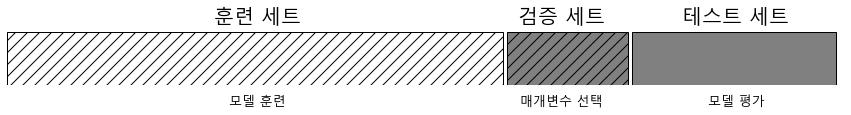

In [16]:
mglearn.plots.plot_threefold_split()

In [17]:
#훈련 / 검증 / 테스트 로 나눈 경우
#검증 세트의 최고점수가 0.96으로 조금 낮아졌는데 모델을 훈련할 때 사용한 데이터가 적어졌기 때문
#테스트 세트 점수는 0.92로 낮아졌으며 새로운 데이터에 대해 92%만 정확하게 분류함

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


In [18]:
#교차 검증을 사용한 경우
#테스트 세트 점수가 0.97로 향상되었음 -> 높은 정확도
#최적의 파라미터는 C=10, gamma=0.1

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 0.97
최적 파라미터:  {'C': 10, 'gamma': 0.1}
최적 파라미터에서 테스트 세트 점수: 0.97


## sklearn.model_selection.GridSearchCV
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)  

* cv_result_속성에 훈련 폴드의 점수를 포함시키려면 `return_train_score=True` 로 설정

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [20]:
#위에서 교차검증으로 구현했던 부분 ->gridsearchCV함수 사용하면 더 편리함

print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))
print("최고 성능 모델:\n", grid_search.best_estimator_)

테스트 세트 점수: 0.97
최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97
최고 성능 모델:
 SVC(C=10, gamma=0.1)


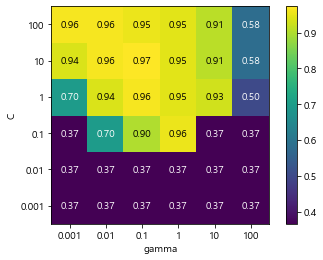

In [21]:
#cv_results_dictionary ->dataFrame 해줘야 함
#heatmap으로 보면 가장 높은 점수 0.97일때 c=10, gamma=0.1 이다
#옆에 colobar 추가
results = pd.DataFrame(grid_search.cv_results_)
results.head(5)

scores = np.array(results.mean_test_score).reshape(6, 6)

heatmap = mglearn.tools.heatmap(
    scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.colorbar(heatmap)

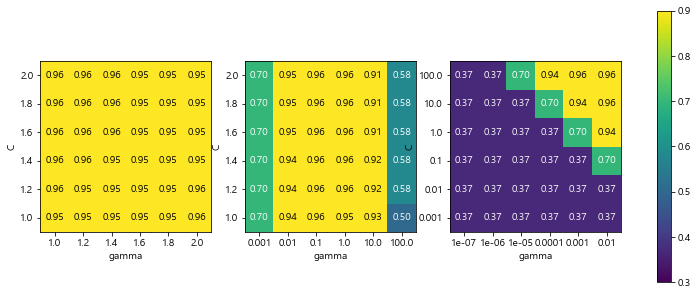

In [22]:
#첫번째 그래프의 경우는 C와 gamma의 스케일과 범위가 부적절할 때 발생
#두번째 그래프의 경우 gamma 매개변수만 정확도에 영향을 준다는 의미
#세번째 그래프의 경우 오른쪽 윗 부분만 정확도가 높은데, 이 부분을 포함하여 범위 설정을 다시 해줘야 함

fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),'gamma':  np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma':  np.logspace(-7, -2, 6)}


for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

        scores_image = mglearn.tools.heatmap(
            scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
            yticklabels=param_grid['C'], cmap="viridis", ax=ax, vmin=0.3, vmax=0.9)

plt.colorbar(scores_image, ax=axes.tolist())

In [23]:
#비대칭 매개변수 그리드 탐색 -> 'kercel'에 따라 매개변수가 결정됨
#kernel=rbf 는 C와 gamma 모두 사용
#kernel=linear 는 선형모델이고 C 매개변수만 사용함 (gamma 사용 안함)

param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [24]:
#중첩 교차 검증의 결과를 요약하면 SVC는 iris 데이터셋에서 평균 교차 검증 정확도가 98%

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수:{:.2f}".format(scores.mean()))

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수:0.98


In [25]:
#거의 아무것도 학습하지 않고 90% 정확도 -> 실제 분류기 사용하여 비교해봐야 함

from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [26]:
#결정트리의 정확도는 0.92가 나옴 -> 과연 이것이 좋은 분류기인가? 생각해봐야함 

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [27]:
#이 결과를 보면 dummy 점수가 로지스틱회귀와 비교했을 때 현저히 안 좋음을 보여줌
#로지스틱 회귀의 경우에도 점수가 0.98로 매우 높게 나옴

from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.80
logreg 점수: 0.98


### 오차 행렬 (confusion matrix)
+ 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나  
+ TP (True Positive) / TN(True Negative) -> 실제의 결과를 잘 분류했을 경우  
+ FP(False Positive) / FN(False Negative) -> 반대로 잘못 분류한 경우(**상황에 따라 정말 큰일! 예. 암진단**)

In [28]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


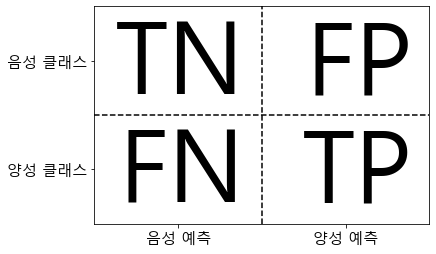

In [29]:
mglearn.plots.plot_binary_confusion_matrix()

In [30]:
#빈도 기반 dummy의 경우 매우 뭔가 잘못됨을 알 수 있음 -> 0 인 부분 / 이상하게 이진분류가 된 느낌
#무작위 dummy 모델의 경우 FP, FN이 너무 많음 -> 정확도에 의심이 감
#결정트리의 경우에도 위와 마찬가지로 정확도가 낮아보임
#로지스틱의 경우 가장 이상적인 모델로 보임 -> FP이 1로 생명과 연결된 부분이라면 높은 정확도가 중요함

print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[356  47]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


In [31]:
#각 클래스가 양성일 때 정밀도, 재현율, f1-score report
#빈도 기반 dummy의 경우 양성클래스가 0이여서 f1 스코어가 0


from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.12
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


## ROC/AUC
+ ROC(Receiver operating characteristics)  
 - 진짜 양성 비율(TPR, 재현율)에 대한 거짓 양성 비율(FPR)의 그래프  
 
 
+ sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)  


+ 왼쪽 위에 가까울수록 높은 성능  
 - 거짓양성이 낮으면서 재현율이 높은 모델  
 - FPR을 조금 늘려 재현율을 크게 높일 수 있다(검증 데이터 사용)  
 
 
+ 양성/음성을 모두 고려함


+ AUC(Area under the curve)  
 - ROC 곡선 아래의 면적  
 
 
+ sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)  
 - 0~1 사이 값, 기본 0.5  
 - 1: 모든 양성 포인트의 점수가 음성 포인트보다 높음


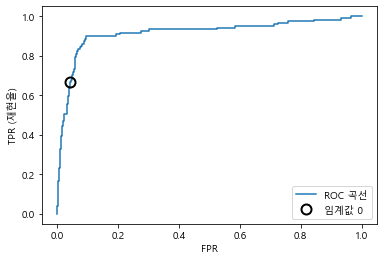

In [32]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

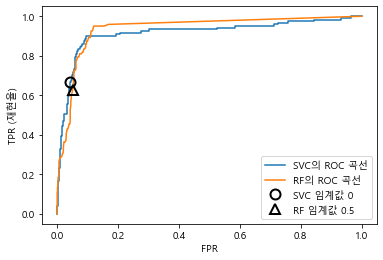

In [33]:
#불균형 데이터셋에서 무작위로 선택하면 TPR, FPR이 비슷해지므로 y=x가 되어 AUC는 0.5에 가까워짐

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [34]:
#다중 분류의 평가 지표
#정확도가 높게 분류됨 0.95

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


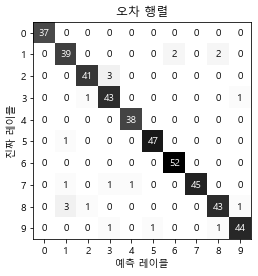

In [35]:
#손글씨 숫자 10개에 대한 오차 행렬 시각화
#0,7-> 세로가 다 0 -> 정밀도 1
#0,4,6->가로가 다 0 ->재현율 1

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [36]:
#숫자 0은 오차가 없으므로 정밀도와 재현율 1
#precision = 정밀도
#recall = 재현율
#다른 숫자에 비해 1,3,8은 분류의 정확도가 낮음

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



+ "macro" 평균은 클래스별 f1-점수에 가중치를 주지 않으며 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룸  
+ "micro" 평균은 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1-점수를 이 수치로 계산

In [37]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954
